Akar yang ditemukan: 1.5213775634765625
Iterasi |     a      |     b      |     c      |    f(c)   
-------------------------------------------------------------
      1 |   1.000000 |   2.000000 |   1.500000 |  -0.125000
      2 |   1.500000 |   2.000000 |   1.750000 |   1.609375
      3 |   1.500000 |   1.750000 |   1.625000 |   0.666016
      4 |   1.500000 |   1.625000 |   1.562500 |   0.252197
      5 |   1.500000 |   1.562500 |   1.531250 |   0.059113
      6 |   1.500000 |   1.531250 |   1.515625 |  -0.034054
      7 |   1.515625 |   1.531250 |   1.523438 |   0.012250
      8 |   1.515625 |   1.523438 |   1.519531 |  -0.010971
      9 |   1.519531 |   1.523438 |   1.521484 |   0.000622
     10 |   1.519531 |   1.521484 |   1.520508 |  -0.005179
     11 |   1.520508 |   1.521484 |   1.520996 |  -0.002279
     12 |   1.520996 |   1.521484 |   1.521240 |  -0.000829
     13 |   1.521240 |   1.521484 |   1.521362 |  -0.000103
     14 |   1.521362 |   1.521484 |   1.521423 |   0.00025

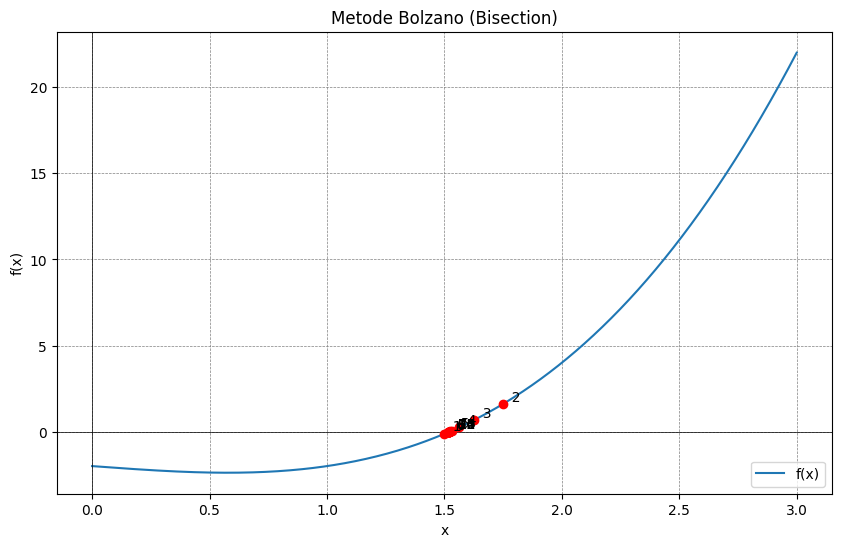

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi yang akan kita cari akarnya (bisa diganti dengan fungsi lain)
def f(x):
    return x**3 - x - 2

# Metode Bolzano (Bisection)
def bolzano(a, b, tol):
    if f(a) * f(b) >= 0:
        print("Metode Bolzano(Bisection) gagal.")
        return None
    
    iterasi = 0
    c = a
    iterasi_data = []
    
    while (b - a) / 2.0 > tol:
        c = (a + b) / 2.0
        iterasi += 1
        iterasi_data.append((iterasi, a, b, c, f(c)))
        
        if f(c) == 0:
            break
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    return c, iterasi_data

# Parameter awal (bisa diganti)
a = 1 # (batas bawah)
b = 2   # (batas atas)
tol = 1e-5 # toleransi

# Menjalankan Metode Bolzano (Bisection)
akar, iterasi_data = bolzano(a, b, tol)

# Menampilkan hasil
print(f"Akar yang ditemukan: {akar}")
print("Iterasi |     a      |     b      |     c      |    f(c)   ")
print("-------------------------------------------------------------")
for data in iterasi_data:
    print(f"{data[0]:>7} | {data[1]:>10.6f} | {data[2]:>10.6f} | {data[3]:>10.6f} | {data[4]:>10.6f}")

# Plotting fungsi dan proses iteratif
x = np.linspace(a-1, b+1, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Menampilkan iterasi dalam plot
for data in iterasi_data:
    plt.plot(data[3], f(data[3]), 'ro')
    plt.text(data[3], f(data[3]), f'  {data[0]}', verticalalignment='bottom')

plt.title('Metode Bolzano (Bisection)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()